# Imports and function definitions

In [49]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [50]:
def scatterplot_and_heatmaps(df, name_text, unit, target_column, prediction_column, alpha=0.01):
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))
    axs[0].scatter(df[target_column], df[prediction_column], alpha=alpha)
    axs[0].plot([0, 1], [0, 1], color='black', transform=axs[0].transAxes, label='Identity line x=y') #Plot identity line
    axs[0].set_title('Scatterplot for ' + name_text)
    axs[0].set_xlabel(f"Target {name_text} [{unit}]")
    axs[0].set_ylabel(f"Predicted {name_text} [{unit}]")
    axs[0].legend()

    (h2d_h, h2d_xedg, h2d_yedg, h2d_img) = axs[1].hist2d(df[target_column], df[prediction_column], bins=100, norm=mpl.colors.LogNorm(clip=True))
    axs[1].plot([0, 1], [0, 1], color='black', transform=axs[1].transAxes, label='Identity line x=y') #Plot identity line
    axs[1].set_title('Heatmap for ' + name_text + ', log scaled colormap')
    axs[1].set_xlabel(f"Target {name_text} [{unit}]")
    axs[1].set_ylabel(f"Predicted {name_text} [{unit}]")
    fig.colorbar(h2d_img, ax=axs[1], label='Count colormap')
    axs[1].legend()

    hist = h2d_h.copy().T
    with np.errstate(divide='ignore', invalid='ignore'):  # suppress division by zero warnings
        hist *= 1 / hist.sum(axis=0, keepdims=True)
        
    #Remove nans, to remove white columns
    hist[np.isnan(hist)] = 0

    pcm = axs[2].pcolormesh(h2d_xedg, h2d_yedg, hist, norm=mpl.colors.LogNorm(clip=True))
    axs[2].plot([0, 1], [0, 1], color='black', transform=axs[2].transAxes, label='Identity line x=y') #Plot identity line
    axs[2].set_title('Heatmap for ' + name_text + ', normalized columns, log scaled colormap')
    axs[2].set_xlabel(f"Target {name_text} [{unit}]")
    axs[2].set_ylabel(f"Predicted {name_text} [{unit}]")
    fig.colorbar(pcm, ax=axs[2], label='Frequency colormap')
    axs[2].legend()

    display(fig)
    plt.close()

# Load data

In [51]:
#model_result_dir = '/data/exjobb/sarssw/result_predictions/best_val_loss-epoch=15-val_loss=0.28.ckpt'
#model_result_dir = '/data/exjobb/sarssw/result_predictions/best_val_loss-epoch=41-val_loss=0.28.ckpt' #Best
#model_result_dir = '/data/exjobb/sarssw/result_predictions/latest-epoch-epoch=56.ckpt'

#model_result_dir = '/data/exjobb/sarssw/result_predictions_only_features/best_val_loss-epoch=41-val_loss=0.31.ckpt' #Best
model_result_dir = '/data/exjobb/sarssw/result_predictions_only_features/best_val_loss-epoch=55-val_loss=0.31.ckpt'
#model_result_dir = '/data/exjobb/sarssw/result_predictions_only_features/latest-epoch-epoch=99.ckpt'

In [52]:
# Read results
with open(os.path.join(model_result_dir, 'results.txt'), 'r') as f:
    print(f.read())

Validation on the train data:
[{'val_loss': 0.2732081413269043, 'val_wave_rmse': 0.4441096782684326, 'val_wind_rmse': 1.5781503915786743, 'val_wave_mae': 0.3485676646232605, 'val_wind_mae': 1.2593939304351807}]
Validation on the validation data:
[{'val_loss': 0.3035591244697571, 'val_wave_rmse': 0.5250780582427979, 'val_wind_rmse': 1.5145567655563354, 'val_wave_mae': 0.39904066920280457, 'val_wind_mae': 1.237464189529419}]
Test result on the test data:
[{'test_loss': 0.29730314016342163, 'test_wave_rmse': 0.5156828165054321, 'test_wind_rmse': 1.48218834400177, 'test_wave_mae': 0.39236995577812195, 'test_wind_mae': 1.2180559635162354}]


In [53]:
train_result_df = pd.read_csv(os.path.join(model_result_dir, 'train_predictions.csv')) #train_predictions.csv test_predictions.csv val_predictions.csv
val_result_df = pd.read_csv(os.path.join(model_result_dir, 'val_predictions.csv')) #train_predictions.csv test_predictions.csv val_predictions.csv
#test_result_df = pd.read_csv(os.path.join(model_result_dir, 'test_predictions.csv')) #train_predictions.csv test_predictions.csv val_predictions.csv
#display(val_result_df)

In [54]:
# Load dataframe for features and labels
feature_labels_path = '/data/exjobb/sarssw/sar_dataset_features_labels_22_may/sar_dataset.pickle'
feature_labels = pd.read_pickle(feature_labels_path)
display(feature_labels.columns)
display(feature_labels)

Index(['sar_name', 'bouy_name', 'file_name', 'pol', 'incidence', 'safe',
       'swath', 'platform', 'orbit_pass', 'product', 'platform_heading',
       'polarisations', 'longitude', 'latitude', 'time', 'subimage_index',
       'hom_test', 'contrast', 'dissimilarity', 'homogeneity', 'energy',
       'correlation', 'ASM', 'sigma_mean', 'sigma_var', 'sigma_mean_over_var',
       'sigma_min', 'sigma_max', 'sigma_range', 'acw', 'acw_db', 'acw_median',
       'acw_median_db', 'SWH_value', 'SWH_source', 'SWH_lon', 'SWH_lat',
       'SWH_time', 'WSPD_value', 'WSPD_source', 'WSPD_lon', 'WSPD_lat',
       'WSPD_time', 'split'],
      dtype='object')

,sar_name,bouy_name,file_name,pol,incidence,safe,swath,platform,orbit_pass,product,...,SWH_source,SWH_lon,SWH_lat,SWH_time,WSPD_value,WSPD_source,WSPD_lon,WSPD_lat,WSPD_time,split
0,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,AR_TS_MO_Blakksnes,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,HH,28.741270,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,EW,SENTINEL-1A,Descending,GRDH,...,bouy,-24.778168,65.69783,2021-01-03 08:00:00,9.247744,model,-24.778168,65.69783,2021-01-03 08:22:38,train
1,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,AR_TS_MO_Blakksnes,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,HV,28.741270,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,EW,SENTINEL-1A,Descending,GRDH,...,bouy,-24.778168,65.69783,2021-01-03 08:00:00,9.247744,model,-24.778168,65.69783,2021-01-03 08:22:38,train
2,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,AR_TS_MO_Blakksnes,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,HH,28.704935,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,EW,SENTINEL-1A,Descending,GRDH,...,bouy,-24.778168,65.69783,2021-01-03 08:00:00,9.247744,model,-24.778168,65.69783,2021-01-03 08:22:38,train
3,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,AR_TS_MO_Blakksnes,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,HV,28.704935,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,EW,SENTINEL-1A,Descending,GRDH,...,bouy,-24.778168,65.69783,2021-01-03 08:00:00,9.247744,model,-24.778168,65.69783,2021-01-03 08:22:38,train
4,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,AR_TS_MO_Blakksnes,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,HH,28.704821,S1A_EW_GRDH_1SDH_20210103T082208_20210103T0823...,EW,SENTINEL-1A,Descending,GRDH,...,bouy,-24.778168,65.69783,2021-01-03 08:00:00,9.247744,model,-24.778168,65.69783,2021-01-03 08:22:38,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878397,S1B_IW_GRDH_1SSH_20211217T083311_20211217T0833...,GL_TS_MO_55038,S1B_IW_GRDH_1SSH_20211217T083311_20211217T0833...,HH,45.246292,S1B_IW_GRDH_1SSH_20211217T083311_20211217T0833...,IW,SENTINEL-1B,Ascending,GRDH,...,bouy,151.500000,-23.90000,2021-12-17 08:30:00,6.269688,model,151.500000,-23.90000,2021-12-17 08:33:24,test
878398,S1B_IW_GRDH_1SSH_20211217T083311_20211217T0833...,GL_TS_MO_55038,S1B_IW_GRDH_1SSH_20211217T083311_20211217T0833...,HH,45.297585,S1B_IW_GRDH_1SSH_20211217T083311_20211217T0833...,IW,SENTINEL-1B,Ascending,GRDH,...,bouy,151.500000,-23.90000,2021-12-17 08:30:00,6.269688,model,151.500000,-23.90000,2021-12-17 08:33:24,test
878399,S1B_IW_GRDH_1SSH_20211217T083311_20211217T0833...,GL_TS_MO_55038,S1B_IW_GRDH_1SSH_20211217T083311_20211217T0833...,HH,45.297779,S1B_IW_GRDH_1SSH_20211217T083311_20211217T0833...,IW,SENTINEL-1B,Ascending,GRDH,...,bouy,151.500000,-23.90000,2021-12-17 08:30:00,6.269688,model,151.500000,-23.90000,2021-12-17 08:33:24,test
878400,S1B_IW_GRDH_1SSH_20211217T083311_20211217T0833...,GL_TS_MO_55038,S1B_IW_GRDH_1SSH_20211217T083311_20211217T0833...,HH,45.297394,S1B_IW_GRDH_1SSH_20211217T083311_20211217T0833...,IW,SENTINEL-1B,Ascending,GRDH,...,bouy,151.500000,-23.90000,2021-12-17 08:30:00,6.269688,model,151.500000,-23.90000,2021-12-17 08:33:24,test


# Train results

In [55]:
train_result_merged = train_result_df.merge(feature_labels[['file_name', 'SWH_source', 'WSPD_source']], on='file_name', how='left')
display(train_result_merged)


,Unnamed: 0,file_name,target_wave,target_wind,prediction_wave,prediction_wind,SWH_source,WSPD_source
0,0,S1A_IW_GRDH_1SDV_20210101T000131_20210101T0001...,1.719,10.501644,1.865454,8.934394,bouy,bouy
1,0,S1A_IW_GRDH_1SDV_20210101T000131_20210101T0001...,1.719,10.501644,1.865454,8.934394,bouy,bouy
2,1,S1A_IW_GRDH_1SDV_20210101T000131_20210101T0001...,1.719,10.501644,1.956320,8.839983,bouy,bouy
3,1,S1A_IW_GRDH_1SDV_20210101T000131_20210101T0001...,1.719,10.501644,1.956320,8.839983,bouy,bouy
4,2,S1A_IW_GRDH_1SDV_20210101T000131_20210101T0001...,1.719,10.501644,1.845764,8.880607,bouy,bouy
...,...,...,...,...,...,...,...,...
314453,157226,S1B_IW_GRDH_1SDV_20211223T064837_20211223T0649...,3.499,7.564137,2.321054,7.999113,bouy,model
314454,157227,S1B_IW_GRDH_1SDV_20211223T064837_20211223T0649...,3.499,7.564137,2.361292,8.260044,bouy,model
314455,157227,S1B_IW_GRDH_1SDV_20211223T064837_20211223T0649...,3.499,7.564137,2.361292,8.260044,bouy,model
314456,157228,S1B_IW_GRDH_1SDV_20211223T064837_20211223T0649...,3.499,7.564137,2.377475,7.868650,bouy,model


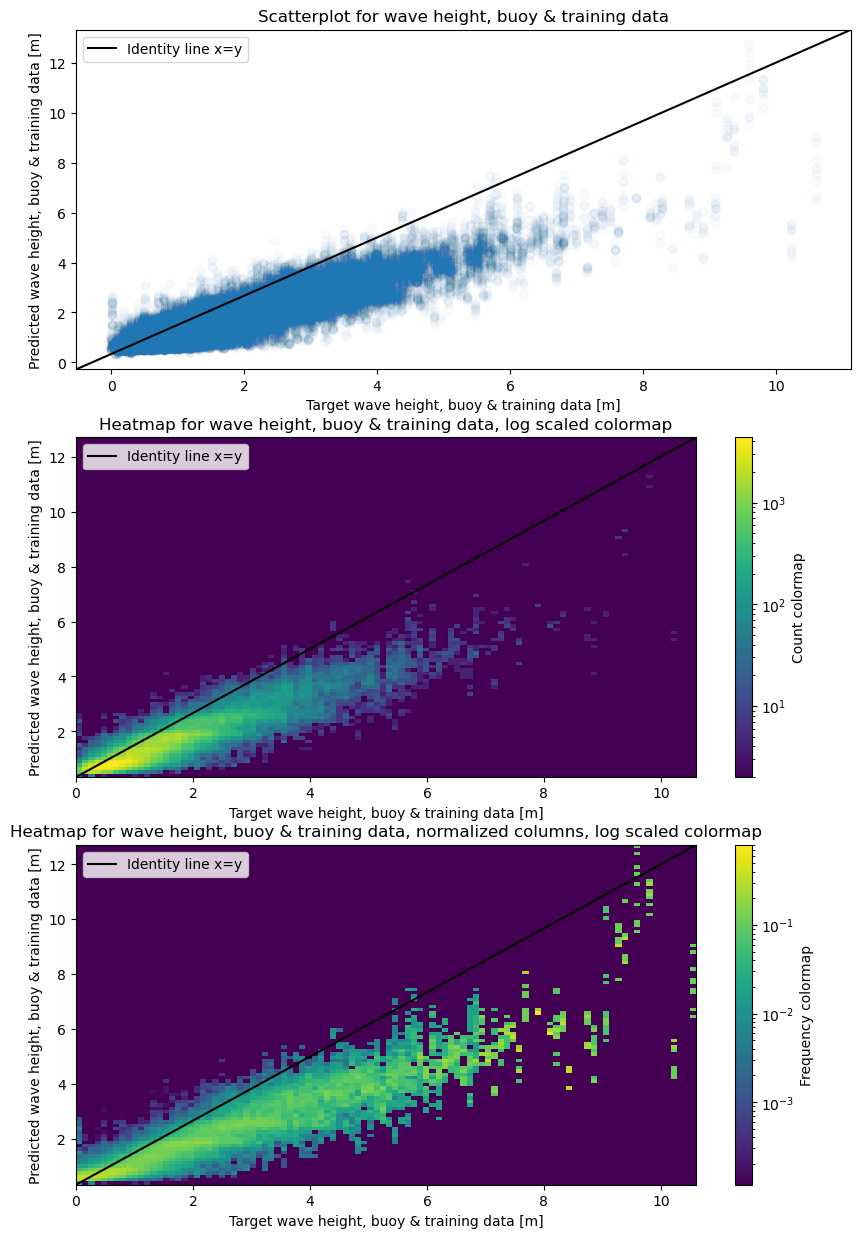

In [56]:
wave_mask = train_result_merged['SWH_source'] == 'bouy'
wave_buoy_result_df = train_result_merged[wave_mask][['target_wave', 'prediction_wave']]
scatterplot_and_heatmaps(wave_buoy_result_df, "wave height, buoy & training data", "m", "target_wave", "prediction_wave")

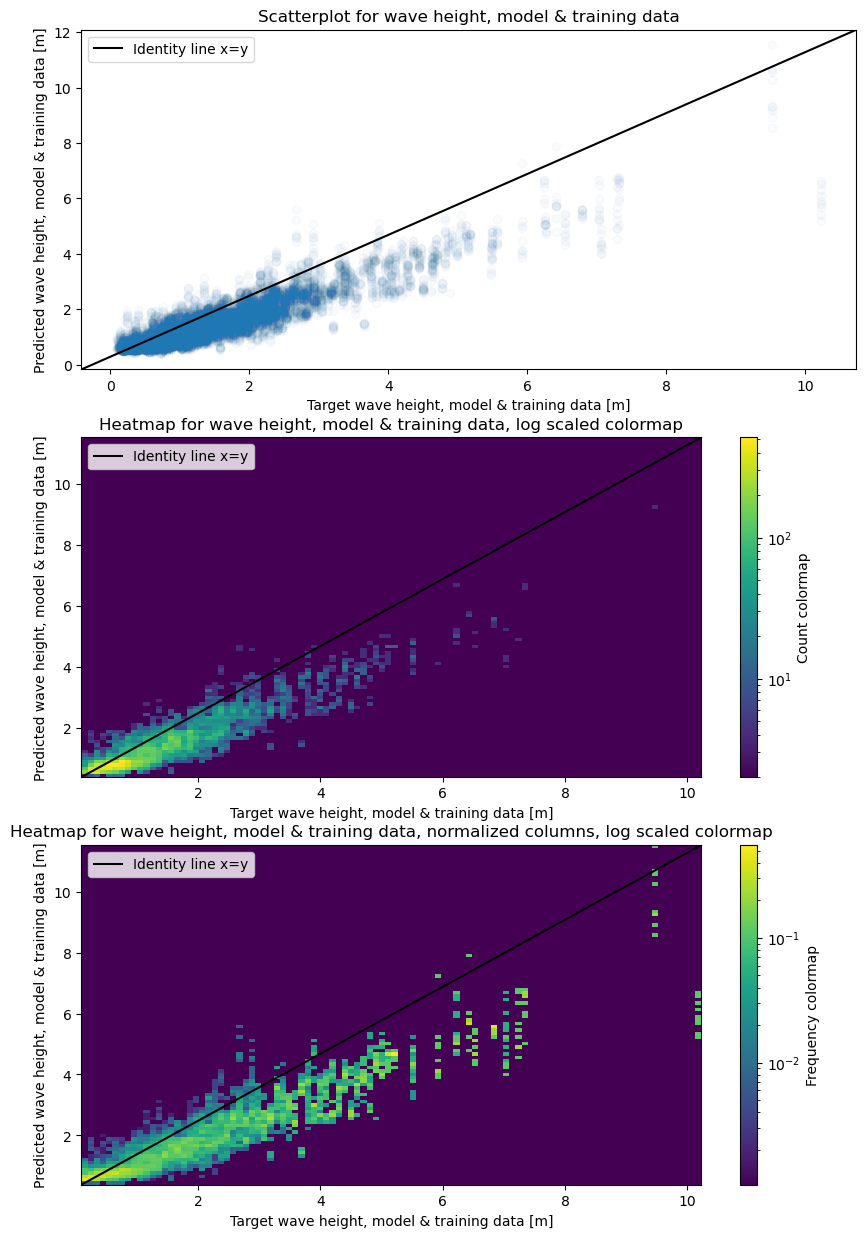

In [57]:
wave_mask = train_result_merged['SWH_source'] == 'model'
wave_buoy_result_df = train_result_merged[wave_mask][['target_wave', 'prediction_wave']]
scatterplot_and_heatmaps(wave_buoy_result_df, "wave height, model & training data", "m", "target_wave", "prediction_wave")

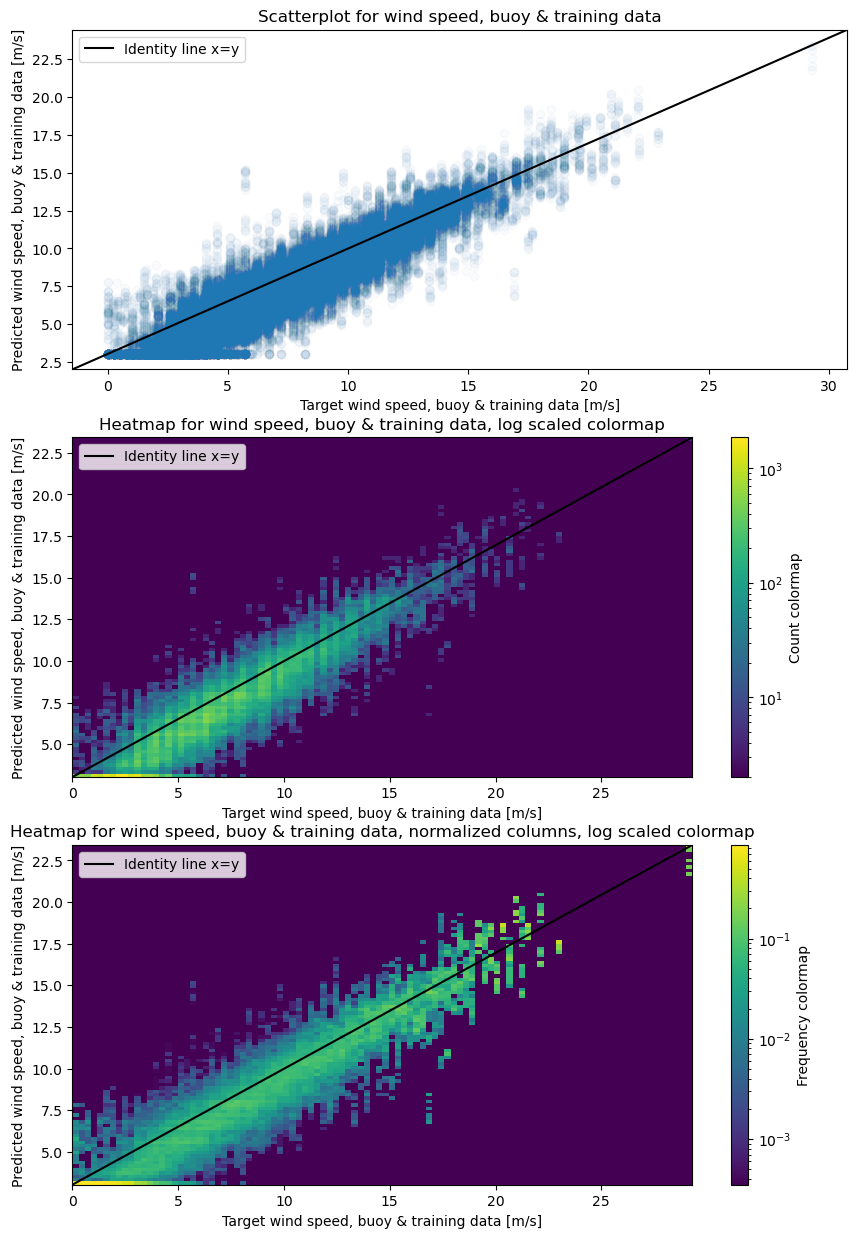

In [58]:
wind_mask = train_result_merged['WSPD_source'] == 'bouy'
wind_buoy_result_df = train_result_merged[wind_mask][['target_wind', 'prediction_wind']]
scatterplot_and_heatmaps(wind_buoy_result_df, "wind speed, buoy & training data", "m/s", "target_wind", "prediction_wind")

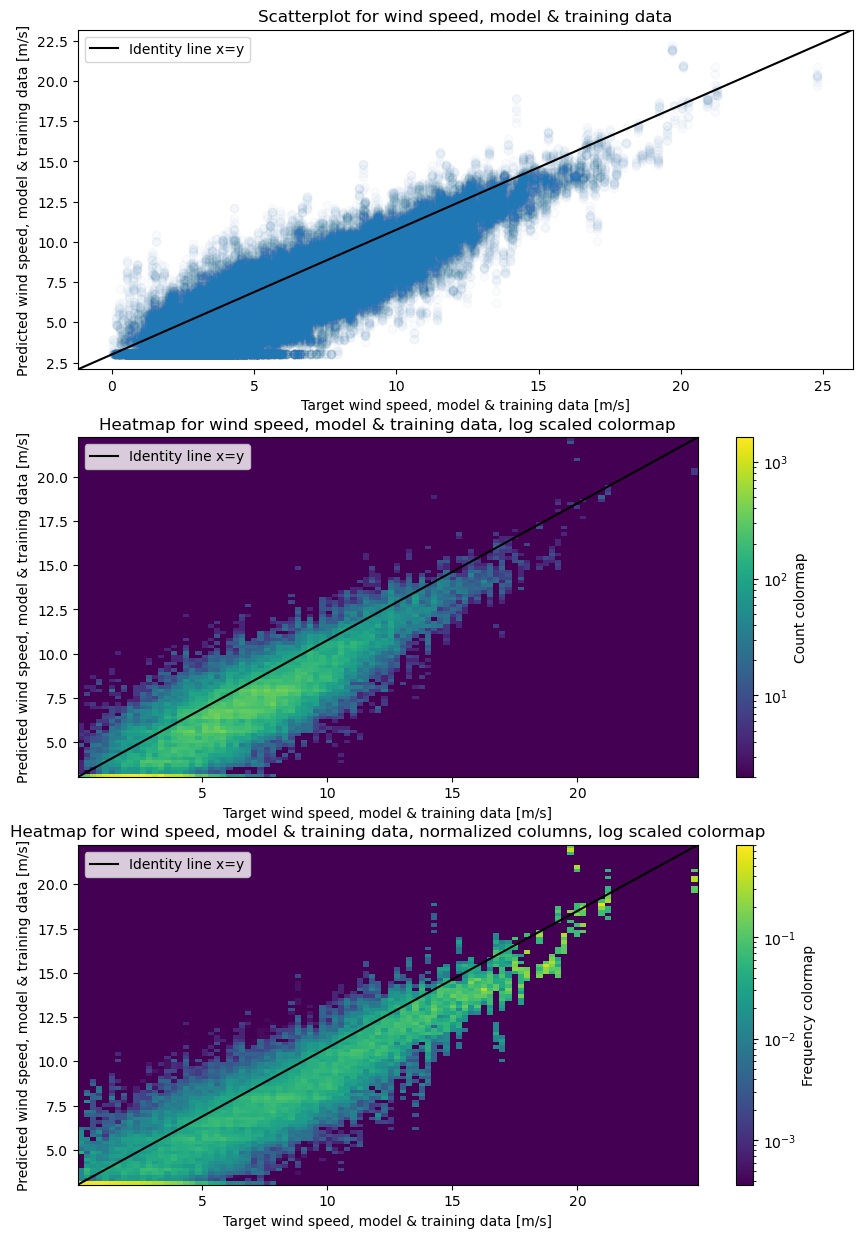

In [59]:
wind_mask = train_result_merged['WSPD_source'] == 'model'
wind_model_result_df = train_result_merged[wind_mask][['target_wind', 'prediction_wind']]
scatterplot_and_heatmaps(wind_model_result_df, "wind speed, model & training data", "m/s", "target_wind", "prediction_wind")

# Validation results on buoy data

In [60]:
print('Number of buoy values for wave height in the validation set', (val_result_df['target_wave'] != -1).sum())
print('Number of buoy values for wind speed in the validation set', (val_result_df['target_wind'] != -1).sum())

Number of buoy values for wave height in the validation set 47191
Number of buoy values for wind speed in the validation set 22439


In [61]:
wave_mask = val_result_df['target_wave'] != -1
wave_buoy_result_df = val_result_df[wave_mask][['target_wave', 'prediction_wave']]
#display('wave_buoy_result_df', wave_buoy_result_df)

wind_mask = val_result_df['target_wind'] != -1
wind_buoy_result_df = val_result_df[wind_mask][['target_wind', 'prediction_wind']]
#display('wind_buoy_result_df', wind_buoy_result_df)

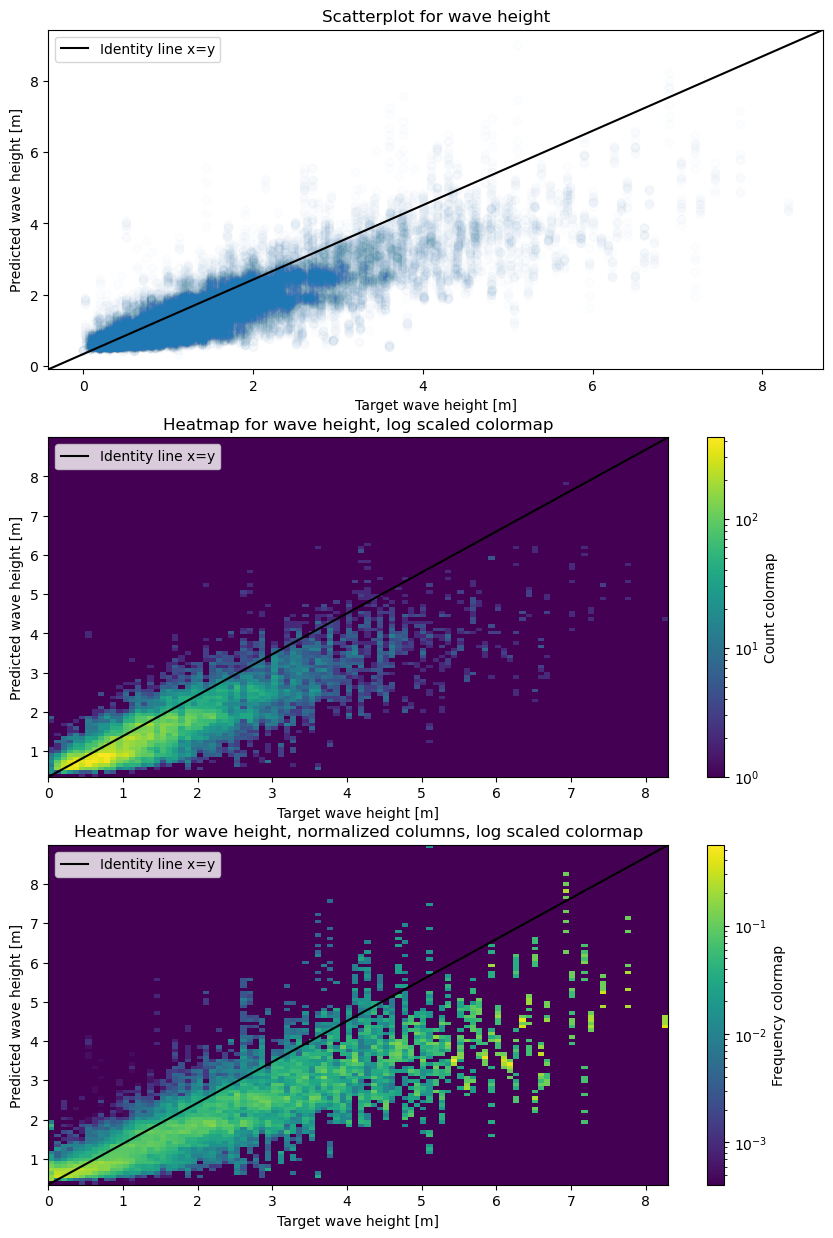

In [62]:
scatterplot_and_heatmaps(wave_buoy_result_df, "wave height", "m", "target_wave", "prediction_wave")

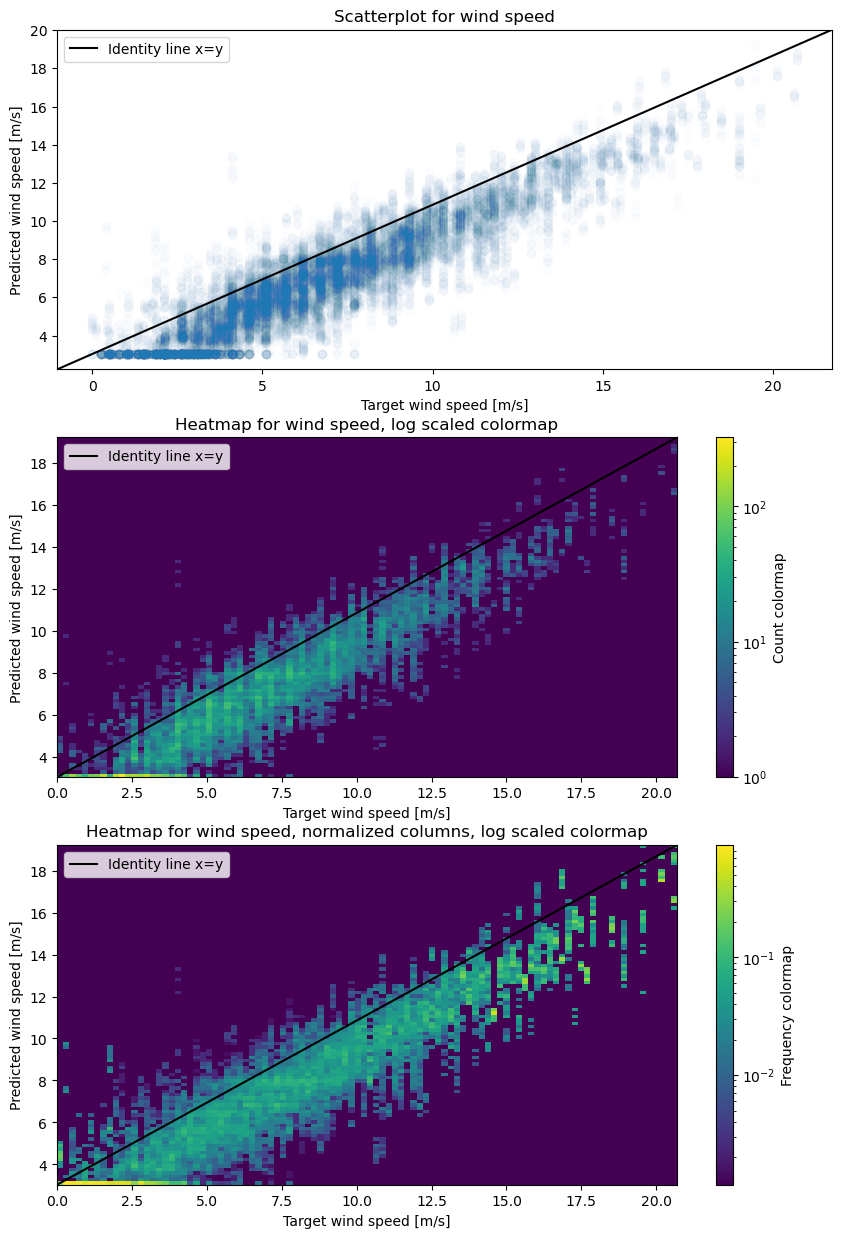

In [63]:
scatterplot_and_heatmaps(wind_buoy_result_df, "wind speed", "m/s", "target_wind", "prediction_wind")

# Validation results on model data

In [64]:
print('Number of model values for wave height in the validation set', (val_result_df['target_wave'] == -1).sum())
print('Number of model values for wind speed in the validation set', (val_result_df['target_wind'] == -1).sum())

Number of model values for wave height in the validation set 4444
Number of model values for wind speed in the validation set 29196


In [65]:
wave_mask = val_result_df['target_wave'] != -1
wave_model_result_df = val_result_df[~wave_mask][['file_name', 'target_wave', 'prediction_wave']]
#display('wave_model_result_df', wave_model_result_df)

wind_mask = val_result_df['target_wind'] != -1
wind_model_result_df = val_result_df[~wind_mask][['file_name', 'target_wind', 'prediction_wind']]
#display('wind_model_result_df', wind_model_result_df)

In [66]:
wave_model_result_df_merged = wave_model_result_df.merge(feature_labels[['file_name', 'SWH_source', 'SWH_value']], on='file_name', how='left')
wind_model_result_df_merged = wind_model_result_df.merge(feature_labels[['file_name', 'WSPD_source', 'WSPD_value']], on='file_name', how='left')
#display(wave_model_result_df_merged)
#display(wind_model_result_df_merged)

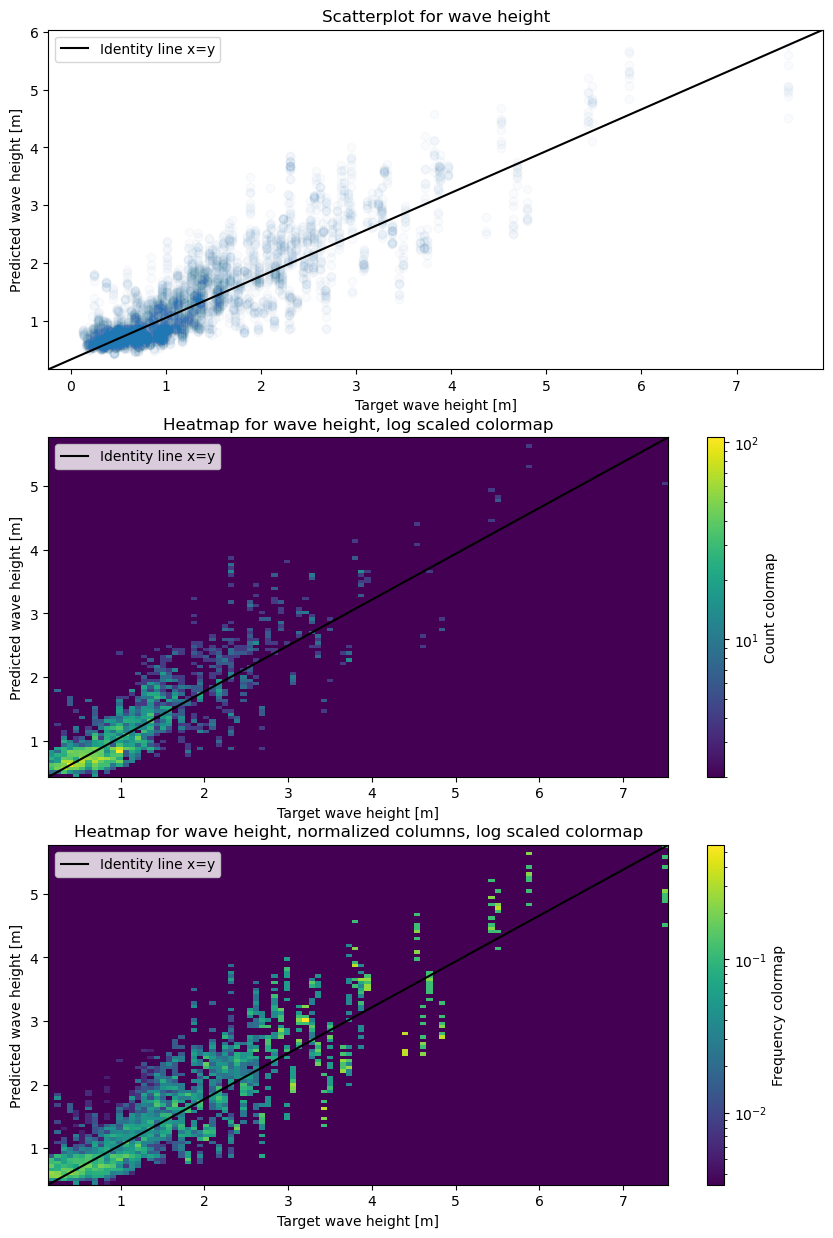

In [67]:
scatterplot_and_heatmaps(wave_model_result_df_merged, "wave height", "m", "SWH_value", "prediction_wave")

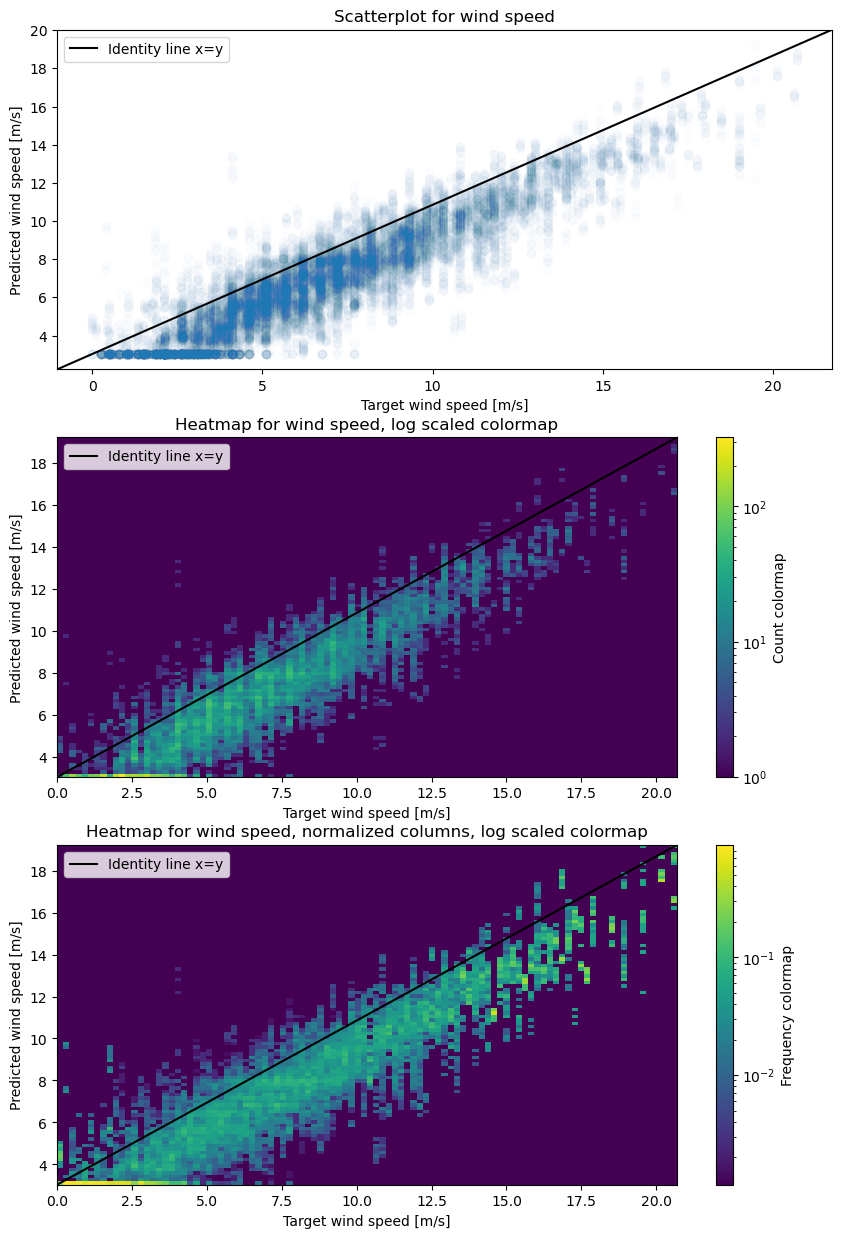

In [68]:
scatterplot_and_heatmaps(wind_buoy_result_df, "wind speed", "m/s", "target_wind", "prediction_wind")